# WeatherPy


### Analysis

* #### Observed Trend 1

    While latitudes 10 through 30 had the highest number of cities reporting no cloud cover, there appears to be no tendency for
    clouds to favor any particular geographic area.


* #### Observed Trend 2

    The temperature clearly rises as you approach the equator in the Northern Hemishpere but this trend isn't as apparent in the
    Southern Hemishpere.  This is due to the fact that when the data was pulled (3/2/2018), it was summer in the Southern
    Hemishpere meaning there was more direct sunlight, making the gradual increase in temperature when moving towards the
    equator less significant.


* #### Observed Trend 3

    The cities randomly selected were relatively calm from a wind standpoint.  Of the 500 cities, only 3 of them (0.6%) reported     wind speeds in excess of 25 miles per hour when queried.

In [1]:
# Import Dependencies
import numpy as np
import pandas as pd
import requests as req
import time as time
import matplotlib.pyplot as plt
import os
import json
from citipy import citipy
%matplotlib inline

In [2]:
# Google Places API Key
api_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath('__file__'))))))
file_name = os.path.join(api_dir,"Desktop", "Bootcamp", "api_keys.json")
data = json.load(open(file_name))
gkey = data['open_weather_map_api_key2']

### Obtain Random Coordinate Pairs

In [3]:
lat = []
lng = []

In [4]:
for x in range(1500):
    lat.append(np.random.uniform(-90,90))
    lng.append(np.random.uniform(-180,180))

In [51]:
df = pd.DataFrame(data=[lat, lng], copy=True)

In [50]:
df = df.T

df.columns = ("lat", "lng")
df.lat = df.lat.round(2)
df.lng = df.lng.round(2)

In [49]:
df['city'] = ""
df['country'] = ""
df['date'] = ""
df['temp_max'] = ""
df['humidity'] = ""
df['wind_speed'] = ""
df['cloudiness'] = ""

### Generate Cities List

In [8]:
for index, row in df.iterrows():
    city = citipy.nearest_city(row['lat'], row['lng'])
    df.set_value(index,'city',city.city_name)

### Perform API Calls

In [11]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={gkey}&q=london"
response = req.get(url)
print(response.status_code)

200


In [12]:
counter = 0
print('Beginning Data Retrieval')
print('----------------------------------------------------------')
for index, row in df.iterrows():
    my_city = (row['city'].replace(" ", "%20"))
    url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={gkey}&q={my_city}"
    
    print(f"Processing City Number: {counter} | {row['city']}")
    print(url)
    print('----------------------------------------------------------')
        
    try:
        info = req.get(url).json()
        temper = (info['main']['temp_max'])
        humid = (info['main']['humidity'])
        wind_speed = (info['wind']['speed'])
        clouds = (info['clouds']['all'])
        country1 = (info['sys']['country'])
        date1 = (info['dt'])

        df.set_value(index,'temp_max',temper)
        df.set_value(index,'humidity',humid)
        df.set_value(index,'wind_speed',wind_speed)
        df.set_value(index,'cloudiness',clouds)
        df.set_value(index,'country',country1)
        df.set_value(index,'date',date1)

    except Exception as e:
        print(f"{row['city']} was skipped")
        print("----------------------")

    counter = counter + 1

Beginning Data Retrieval
----------------------------------------------------------
Processing City Number: 0 | sawtell
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=sawtell
----------------------------------------------------------
Processing City Number: 1 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=hilo
----------------------------------------------------------
Processing City Number: 2 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=taolanaro
----------------------------------------------------------
taolanaro was skipped
----------------------
Processing City Number: 3 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=albany
----------------------------------------------------------
Processing City Number: 4 | busselton
http://api.op

Processing City Number: 39 | sangar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=sangar
----------------------------------------------------------
Processing City Number: 40 | merauke
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=merauke
----------------------------------------------------------
Processing City Number: 41 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=bredasdorp
----------------------------------------------------------
Processing City Number: 42 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=mataura
----------------------------------------------------------
Processing City Number: 43 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=ribeira%20grande
----

Processing City Number: 77 | hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=hasaki
----------------------------------------------------------
Processing City Number: 78 | santa ana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=santa%20ana
----------------------------------------------------------
Processing City Number: 79 | kadykchan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=kadykchan
----------------------------------------------------------
kadykchan was skipped
----------------------
Processing City Number: 80 | zhigansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=zhigansk
----------------------------------------------------------
Processing City Number: 81 | cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea3

Processing City Number: 115 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=vila%20franca%20do%20campo
----------------------------------------------------------
Processing City Number: 116 | avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=avarua
----------------------------------------------------------
Processing City Number: 117 | korla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=korla
----------------------------------------------------------
korla was skipped
----------------------
Processing City Number: 118 | peniche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=peniche
----------------------------------------------------------
Processing City Number: 119 | ayia marina
http://api.openweathermap.org/data/2.5/weather?units=Imperi

Processing City Number: 155 | tigil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=tigil
----------------------------------------------------------
Processing City Number: 156 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=mataura
----------------------------------------------------------
Processing City Number: 157 | unecha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=unecha
----------------------------------------------------------
Processing City Number: 158 | esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=esperance
----------------------------------------------------------
Processing City Number: 159 | kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=kaitangata
---------------

Processing City Number: 194 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=punta%20arenas
----------------------------------------------------------
Processing City Number: 195 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=punta%20arenas
----------------------------------------------------------
Processing City Number: 196 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=atuona
----------------------------------------------------------
Processing City Number: 197 | ulaangom
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=ulaangom
----------------------------------------------------------
Processing City Number: 198 | amderma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=amd

Processing City Number: 232 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=qaanaaq
----------------------------------------------------------
Processing City Number: 233 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=rikitea
----------------------------------------------------------
Processing City Number: 234 | masaka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=masaka
----------------------------------------------------------
Processing City Number: 235 | aransas pass
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=aransas%20pass
----------------------------------------------------------
Processing City Number: 236 | jaslo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=jaslo
-------------

Processing City Number: 271 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=hilo
----------------------------------------------------------
Processing City Number: 272 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=new%20norfolk
----------------------------------------------------------
Processing City Number: 273 | hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=hambantota
----------------------------------------------------------
Processing City Number: 274 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=atuona
----------------------------------------------------------
Processing City Number: 275 | xining
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=xining
-------------

Processing City Number: 310 | norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=norman%20wells
----------------------------------------------------------
Processing City Number: 311 | bandrele
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=bandrele
----------------------------------------------------------
Processing City Number: 312 | lahat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=lahat
----------------------------------------------------------
Processing City Number: 313 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=albany
----------------------------------------------------------
Processing City Number: 314 | dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=dikson
-------------

Processing City Number: 350 | dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=dikson
----------------------------------------------------------
Processing City Number: 351 | kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=kahului
----------------------------------------------------------
Processing City Number: 352 | saint george
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=saint%20george
----------------------------------------------------------
Processing City Number: 353 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=bluff
----------------------------------------------------------
Processing City Number: 354 | verkhnevilyuysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=verkhnevilyuy

Processing City Number: 388 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=vaini
----------------------------------------------------------
Processing City Number: 389 | henties bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=henties%20bay
----------------------------------------------------------
Processing City Number: 390 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=illoqqortoormiut
----------------------------------------------------------
illoqqortoormiut was skipped
----------------------
Processing City Number: 391 | xining
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=xining
----------------------------------------------------------
Processing City Number: 392 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imper

Processing City Number: 426 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=hermanus
----------------------------------------------------------
Processing City Number: 427 | lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=lorengau
----------------------------------------------------------
Processing City Number: 428 | mayo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=mayo
----------------------------------------------------------
Processing City Number: 429 | jabinyanah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=jabinyanah
----------------------------------------------------------
Processing City Number: 430 | bargal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=bargal
-----------------

Processing City Number: 466 | aguimes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=aguimes
----------------------------------------------------------
Processing City Number: 467 | san cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=san%20cristobal
----------------------------------------------------------
Processing City Number: 468 | chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=chuy
----------------------------------------------------------
Processing City Number: 469 | east london
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=east%20london
----------------------------------------------------------
Processing City Number: 470 | san patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=san%

Processing City Number: 506 | la orilla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=la%20orilla
----------------------------------------------------------
Processing City Number: 507 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=bambous%20virieux
----------------------------------------------------------
Processing City Number: 508 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=rikitea
----------------------------------------------------------
Processing City Number: 509 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=leningradskiy
----------------------------------------------------------
Processing City Number: 510 | iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab27

Processing City Number: 544 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=punta%20arenas
----------------------------------------------------------
Processing City Number: 545 | mar del plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=mar%20del%20plata
----------------------------------------------------------
Processing City Number: 546 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=mataura
----------------------------------------------------------
Processing City Number: 547 | tignere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=tignere
----------------------------------------------------------
Processing City Number: 548 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&

Processing City Number: 582 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=rikitea
----------------------------------------------------------
Processing City Number: 583 | wajima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=wajima
----------------------------------------------------------
Processing City Number: 584 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=saint-philippe
----------------------------------------------------------
Processing City Number: 585 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=new%20norfolk
----------------------------------------------------------
Processing City Number: 586 | ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=ilu

Processing City Number: 622 | khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=khatanga
----------------------------------------------------------
Processing City Number: 623 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=severo-kurilsk
----------------------------------------------------------
Processing City Number: 624 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=busselton
----------------------------------------------------------
Processing City Number: 625 | thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=thompson
----------------------------------------------------------
Processing City Number: 626 | trincomalee
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=t

Processing City Number: 660 | bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=bengkulu
----------------------------------------------------------
bengkulu was skipped
----------------------
Processing City Number: 661 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=albany
----------------------------------------------------------
Processing City Number: 662 | mar del plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=mar%20del%20plata
----------------------------------------------------------
Processing City Number: 663 | bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=bethel
----------------------------------------------------------
Processing City Number: 664 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb

Processing City Number: 698 | hobyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=hobyo
----------------------------------------------------------
Processing City Number: 699 | samusu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=samusu
----------------------------------------------------------
samusu was skipped
----------------------
Processing City Number: 700 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=albany
----------------------------------------------------------
Processing City Number: 701 | bolungarvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=bolungarvik
----------------------------------------------------------
bolungarvik was skipped
----------------------
Processing City Number: 702 | san patricio
http://api.openweathermap.org/data/2

Processing City Number: 736 | pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=pisco
----------------------------------------------------------
Processing City Number: 737 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=bredasdorp
----------------------------------------------------------
Processing City Number: 738 | thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=thompson
----------------------------------------------------------
Processing City Number: 739 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=ushuaia
----------------------------------------------------------
Processing City Number: 740 | katobu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=katobu
-----------------

Processing City Number: 776 | rundu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=rundu
----------------------------------------------------------
Processing City Number: 777 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=atuona
----------------------------------------------------------
Processing City Number: 778 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=new%20norfolk
----------------------------------------------------------
Processing City Number: 779 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=yellowknife
----------------------------------------------------------
Processing City Number: 780 | dolores
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=dolores
-------

Processing City Number: 815 | malanje
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=malanje
----------------------------------------------------------
Processing City Number: 816 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=ushuaia
----------------------------------------------------------
Processing City Number: 817 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=vaini
----------------------------------------------------------
Processing City Number: 818 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=illoqqortoormiut
----------------------------------------------------------
illoqqortoormiut was skipped
----------------------
Processing City Number: 819 | yambio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

Processing City Number: 854 | kurchum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=kurchum
----------------------------------------------------------
Processing City Number: 855 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=ribeira%20grande
----------------------------------------------------------
Processing City Number: 856 | flin flon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=flin%20flon
----------------------------------------------------------
Processing City Number: 857 | svetlogorsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=svetlogorsk
----------------------------------------------------------
Processing City Number: 858 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656

Processing City Number: 892 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=georgetown
----------------------------------------------------------
Processing City Number: 893 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=taolanaro
----------------------------------------------------------
taolanaro was skipped
----------------------
Processing City Number: 894 | phan rang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=phan%20rang
----------------------------------------------------------
phan rang was skipped
----------------------
Processing City Number: 895 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=nikolskoye
----------------------------------------------------------
Processing City Number: 896 | terra santa
http://api.ope

rungata was skipped
----------------------
Processing City Number: 931 | seoul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=seoul
----------------------------------------------------------
Processing City Number: 932 | klaksvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=klaksvik
----------------------------------------------------------
Processing City Number: 933 | avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=avarua
----------------------------------------------------------
Processing City Number: 934 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=mataura
----------------------------------------------------------
Processing City Number: 935 | aleysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab

Processing City Number: 969 | dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=dunedin
----------------------------------------------------------
Processing City Number: 970 | cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=cherskiy
----------------------------------------------------------
Processing City Number: 971 | pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=pevek
----------------------------------------------------------
Processing City Number: 972 | kouroussa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=kouroussa
----------------------------------------------------------
Processing City Number: 973 | imbituba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=imbituba
---------------

Processing City Number: 1008 | san cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=san%20cristobal
----------------------------------------------------------
Processing City Number: 1009 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=mataura
----------------------------------------------------------
Processing City Number: 1010 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=hermanus
----------------------------------------------------------
Processing City Number: 1011 | eldikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=eldikan
----------------------------------------------------------
eldikan was skipped
----------------------
Processing City Number: 1012 | saint-georges
http://api.openweathermap.org/data/2.5/weather?units=Imperia

Processing City Number: 1047 | mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=mahebourg
----------------------------------------------------------
Processing City Number: 1048 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=busselton
----------------------------------------------------------
Processing City Number: 1049 | general roca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=general%20roca
----------------------------------------------------------
Processing City Number: 1050 | kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=kapaa
----------------------------------------------------------
Processing City Number: 1051 | abalak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=abalak


Processing City Number: 1085 | gunnedah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=gunnedah
----------------------------------------------------------
Processing City Number: 1086 | farafangana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=farafangana
----------------------------------------------------------
Processing City Number: 1087 | abu dhabi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=abu%20dhabi
----------------------------------------------------------
Processing City Number: 1088 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=vaini
----------------------------------------------------------
Processing City Number: 1089 | paradwip
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=paradwip


Processing City Number: 1124 | dongying
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=dongying
----------------------------------------------------------
Processing City Number: 1125 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=longyearbyen
----------------------------------------------------------
Processing City Number: 1126 | enid
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=enid
----------------------------------------------------------
Processing City Number: 1127 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=ushuaia
----------------------------------------------------------
Processing City Number: 1128 | ksenyevka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=ksenyevka
----

Processing City Number: 1164 | aklavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=aklavik
----------------------------------------------------------
Processing City Number: 1165 | eureka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=eureka
----------------------------------------------------------
Processing City Number: 1166 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=punta%20arenas
----------------------------------------------------------
Processing City Number: 1167 | mar del plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=mar%20del%20plata
----------------------------------------------------------
Processing City Number: 1168 | poum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q

Processing City Number: 1204 | jetalsar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=jetalsar
----------------------------------------------------------
Processing City Number: 1205 | thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=thompson
----------------------------------------------------------
Processing City Number: 1206 | rajpur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=rajpur
----------------------------------------------------------
Processing City Number: 1207 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=pangnirtung
----------------------------------------------------------
Processing City Number: 1208 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=rikitea
----

Processing City Number: 1243 | ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=ilulissat
----------------------------------------------------------
Processing City Number: 1244 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=ushuaia
----------------------------------------------------------
Processing City Number: 1245 | navirai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=navirai
----------------------------------------------------------
Processing City Number: 1246 | chagda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=chagda
----------------------------------------------------------
chagda was skipped
----------------------
Processing City Number: 1247 | natal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8

Processing City Number: 1281 | geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=geraldton
----------------------------------------------------------
Processing City Number: 1282 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=taolanaro
----------------------------------------------------------
taolanaro was skipped
----------------------
Processing City Number: 1283 | saleaula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=saleaula
----------------------------------------------------------
saleaula was skipped
----------------------
Processing City Number: 1284 | tahta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=tahta
----------------------------------------------------------
tahta was skipped
----------------------
Processing City Number: 1285

Processing City Number: 1319 | jumla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=jumla
----------------------------------------------------------
Processing City Number: 1320 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=rikitea
----------------------------------------------------------
Processing City Number: 1321 | lata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=lata
----------------------------------------------------------
Processing City Number: 1322 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=mataura
----------------------------------------------------------
Processing City Number: 1323 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=ushuaia
------------------------

Processing City Number: 1358 | hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=hobart
----------------------------------------------------------
Processing City Number: 1359 | avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=avarua
----------------------------------------------------------
Processing City Number: 1360 | carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=carnarvon
----------------------------------------------------------
Processing City Number: 1361 | kamyshla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=kamyshla
----------------------------------------------------------
Processing City Number: 1362 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=butaritari
------

Processing City Number: 1396 | los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=los%20llanos%20de%20aridane
----------------------------------------------------------
Processing City Number: 1397 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=busselton
----------------------------------------------------------
Processing City Number: 1398 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=mataura
----------------------------------------------------------
Processing City Number: 1399 | pacific grove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=pacific%20grove
----------------------------------------------------------
Processing City Number: 1400 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c

Processing City Number: 1435 | barentsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=barentsburg
----------------------------------------------------------
barentsburg was skipped
----------------------
Processing City Number: 1436 | norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=norman%20wells
----------------------------------------------------------
Processing City Number: 1437 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=busselton
----------------------------------------------------------
Processing City Number: 1438 | changping
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=changping
----------------------------------------------------------
Processing City Number: 1439 | tabas
http://api.openweathermap.org/data/2.5/weather?units

sentyabrskiy was skipped
----------------------
Processing City Number: 1474 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=punta%20arenas
----------------------------------------------------------
Processing City Number: 1475 | sibu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=sibu
----------------------------------------------------------
Processing City Number: 1476 | east london
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=east%20london
----------------------------------------------------------
Processing City Number: 1477 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbbe6d51ea33cc8ed4ab4cab271d8656&q=rikitea
----------------------------------------------------------
Processing City Number: 1478 | ransang
http://api.openweathermap.org/data/2.5/weather?units=Imperial

### Clean Imported Data

In [13]:
df['lat'].replace('', np.nan, inplace=True)
df['lng'].replace('', np.nan, inplace=True)
df['city'].replace('', np.nan, inplace=True)
df['country'].replace('', np.nan, inplace=True)
df['date'].replace('', np.nan, inplace=True)
df['temp_max'].replace('', np.nan, inplace=True)
df['humidity'].replace('', np.nan, inplace=True)
df['wind_speed'].replace('', np.nan, inplace=True)
df['cloudiness'].replace('', np.nan, inplace=True)
len(df)

1500

In [14]:
df = df.dropna(how="any")

In [15]:
df.drop_duplicates("city", keep="first", inplace=True)
len(df)

537

In [16]:
# Trim df to 500 rows
df.drop(df.tail(37).index, inplace=True)
len(df)

500

In [17]:
df.reset_index(drop=True, inplace=True)

500

### Convert To Datetime

In [18]:
#Convert Unix time to datetime
from datetime import datetime

df['date'] = pd.to_datetime(df.date, unit='s')

,lat,lng,city,country,date,temp_max,humidity,wind_speed,cloudiness
0,-30.8,154.39,sawtell,AU,2018-03-03 03:00:00,80.6,74.0,18.34,75.0


In [19]:
#Split Date & Time into separte columns
df['Date'] = df['date'].dt.date
df['Time'] = df['date'].dt.time

,lat,lng,city,country,date,temp_max,humidity,wind_speed,cloudiness,Date,Time
0,-30.8,154.39,sawtell,AU,2018-03-03 03:00:00,80.6,74.0,18.34,75.0,2018-03-03,03:00:00


In [48]:
#Drop date and time columns from df
df = df.drop('date', axis=1)
df = df.drop('Time', axis=1)
df.head()

,lat,lng,city,country,temp_max,humidity,wind_speed,cloudiness,Date
0,-30.80,154.39,sawtell,AU,80.60,74.0,18.34,75.0,2018-03-03
1,16.30,-152.68,hilo,US,73.40,78.0,5.82,90.0,2018-03-03
2,-71.47,115.23,albany,US,33.80,80.0,10.29,90.0,2018-03-03
3,-53.87,90.84,busselton,AU,68.11,100.0,12.77,0.0,2018-03-03
4,-57.24,-177.98,vaini,IN,71.93,66.0,2.71,0.0,2018-03-03


In [21]:
#Create empty lists to hold data for plotting
latitude = [df['lat']]
temperature = [df['temp_max']]
humidity = [df['humidity']]
wind_speed = [df['wind_speed']]
cloudiness = [df['cloudiness']]

### Latitude vs Temperature Plot

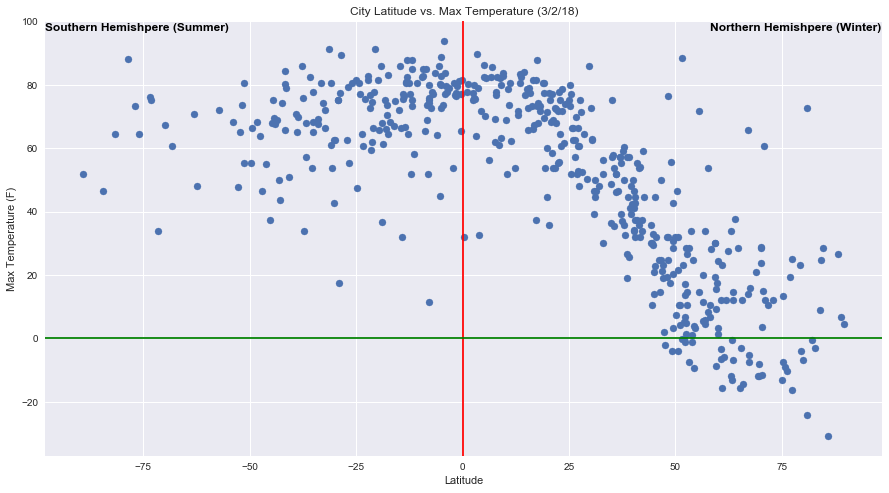

In [36]:
import seaborn as sns

sns.set()
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(latitude,temperature)

plt.axvline(0, color='r')
plt.axhline(0, color='green')
plt.text(58, 97, "Northern Hemishpere (Winter)", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(-98, 97, "Southern Hemishpere (Summer)", horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title(f"City Latitude vs. Max Temperature (3/2/18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.savefig("latitude_vs_max_temperature.png")
plt.show()

### Latitude vs Humidity Plot

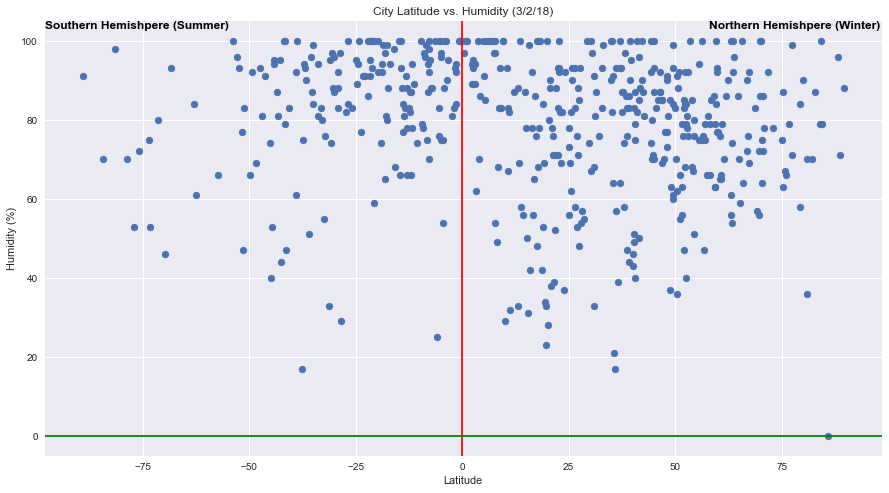

In [39]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(latitude,humidity)

plt.axvline(0, color='r')
plt.axhline(0, color='green')
plt.text(58, 103, "Northern Hemishpere (Winter)", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(-98, 103, "Southern Hemishpere (Summer)", horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title(f"City Latitude vs. Humidity (3/2/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig("city_latitude_vs_humidity.png")
plt.show()

### Latitude vs Cloudiness Plot

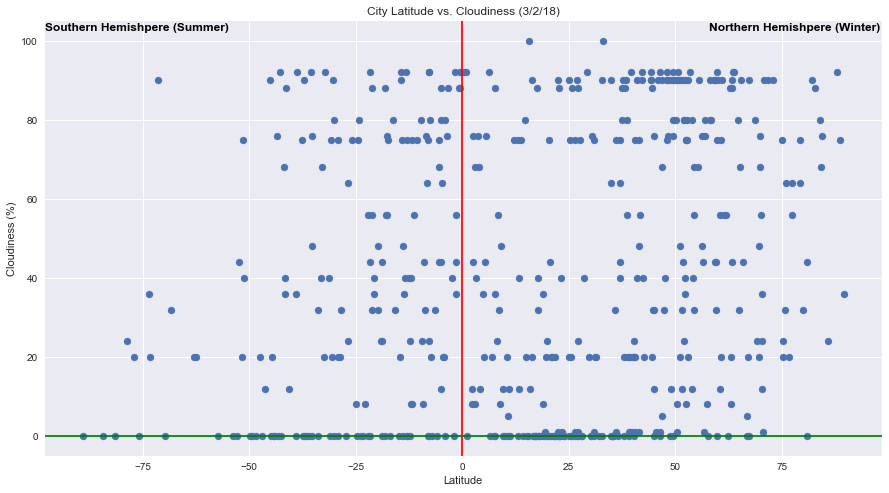

In [40]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(latitude,cloudiness)

plt.axvline(0, color='r')
plt.axhline(0, color='green')
plt.text(58, 102.5, "Northern Hemishpere (Winter)", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(-98, 102.5, "Southern Hemishpere (Summer)", horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title(f"City Latitude vs. Cloudiness (3/2/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig("city_latitude_vs_cloudiness.png")
plt.show()

### Latitude vs Wind Speed Plot

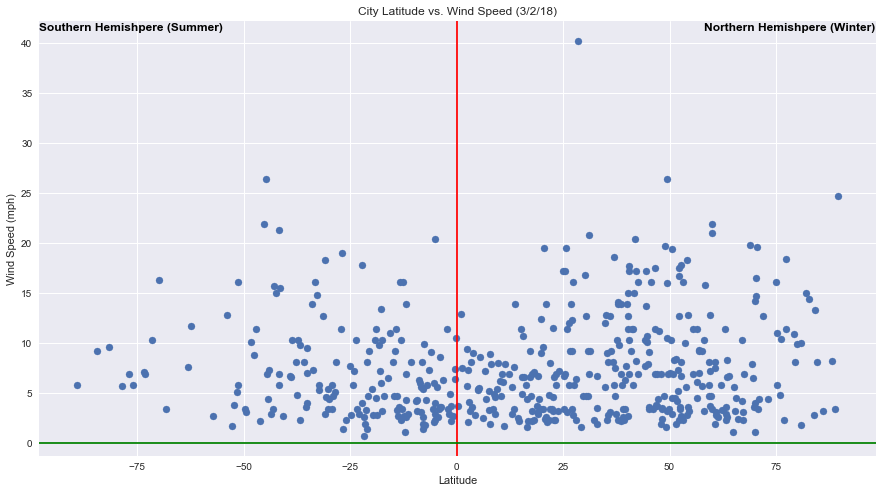

In [45]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(latitude,wind_speed)

plt.axvline(0, color='r')
plt.axhline(0, color='green')
plt.text(58, 41.3, "Northern Hemishpere (Winter)", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(-98, 41.3, "Southern Hemishpere (Summer)", horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title(f"City Latitude vs. Wind Speed (3/2/18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig("city_latitude_vs_windspeed.png")
plt.show()

In [47]:
df.to_csv("WeatherPy.csv", index=True)